In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
#Import all cvs files (4 stocks, ETF, and 10yr T-Bill)

In [3]:
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'), 
                index_col = 'Date',
                parse_dates = True,
                infer_datetime_format = True,                      
                     )
shel_df = shel_df["Adj Close"]

In [4]:
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

In [5]:
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

In [6]:
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

In [7]:
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

In [8]:

treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]

In [9]:
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)

In [10]:
display(energy_stocks_df.head())
display(energy_stocks_df.tail())


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-05-01,58.160614,108.933136,171.674988,94.112198,39.707764
2022-06-01,51.797909,87.461830,143.476334,84.815910,33.274773
2022-07-01,52.877651,95.618851,162.305252,95.997269,36.250000
2022-08-01,52.481411,107.415405,156.636765,94.670158,36.900002
2022-09-01,49.759998,100.889244,143.669998,87.309998,33.330002


In [11]:
#Calculating Pct Change for each stock and ETF

energy_stocks_returns = energy_stocks_df.pct_change().dropna()
energy_stocks_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


In [17]:
#Get the Risk Free Rate from treasury_df
risk_free_rate = treasury_df.mean() / 100

risk_free_rate

0.019737833333333333

In [21]:
treasury_df.mean()

1.9737833333333332

In [28]:
#Sertino ration for shell

#step1: Calculating the excess returns 

shell_returns = shel_df.pct_change().dropna()
Shell_Excess_returns = shell_returns - Expected_returns

#step2: Calulcating Negative excess returns

boolean_filter = Shell_Excess_returns < 0
Negative_excess_shell_returns = Shell_Excess_returns.loc[boolean_filter]
Negative_excess_shell_returns.head()

#step3: Calculating square of negative excess returns

Square_of_negative_excess_shell_returns = Negative_excess_shell_returns**2
Square_of_negative_excess_shell_returns.head()




Date
2017-11-01    0.000006
2018-02-01    0.014154
2018-05-01    0.000591
2018-06-01    0.000133
2018-07-01    0.001034
Name: Adj Close, dtype: float64

In [29]:
#step5: Caluclating the downsize risk and annualizing

Square_of_negative_excess_shell_returns.sum()
Square_of_negative_excess_shell_returns.sum()/12
value = Square_of_negative_excess_shell_returns.sum()/12
SD_negative_excess_shell_returns = np.sqrt(value)

#step6: Calculating Average excess returns and annualizing

Average_Shell_Excess_returns= Shell_Excess_returns.sum()/12

#step7: Calculating the Setino ratio

Sertino_ratio_shell= Average_Shell_Excess_returns/SD_negative_excess_shell_returns
Sertino_ratio_shell

-0.5635531541875928

In [30]:
#Sertino ration for Chevron

#step1: Calculating the excess returns 

chev_returns = cvx_df.pct_change().dropna()
chev_Excess_returns = chev_returns - Expected_returns

#step2: Calulcating Negative excess returns

boolean_filter = chev_Excess_returns < 0
Negative_excess_chev_returns = chev_Excess_returns.loc[boolean_filter]
Negative_excess_chev_returns.head()

#step3: Calculating square of negative excess returns

Square_of_negative_excess_chev_returns = Negative_excess_chev_returns**2
Square_of_negative_excess_chev_returns.head()




Date
2018-01-01    0.000341
2018-02-01    0.016098
2018-05-01    0.000687
2018-07-01    0.000441
2018-08-01    0.006657
Name: Adj Close, dtype: float64

In [31]:
#step4: Caluclating the downsize risk and annualizing

Square_of_negative_excess_chev_returns.sum()
Square_of_negative_excess_chev_returns.sum()/12
value = Square_of_negative_excess_chev_returns.sum()/12
SD_negative_excess_chev_returns = np.sqrt(value)

#step5: Calculating Average excess returns and annualizing

Average_chev_Excess_returns= chev_Excess_returns.sum()/12

#step6: Calculating the Setino ratio

Sertino_ratio_chev= Average_chev_Excess_returns/SD_negative_excess_chev_returns
Sertino_ratio_chev

-0.2868677241223427

In [32]:
#Sertino ration for Exxon

#step1: Calculating the excess returns 

Exxon_returns = xom_df.pct_change().dropna()
Exxon_Excess_returns = Exxon_returns - Expected_returns

#step2: Calulcating Negative excess returns

boolean_filter = Exxon_Excess_returns < 0
Negative_excess_Exxon_returns = Exxon_Excess_returns.loc[boolean_filter]
Negative_excess_Exxon_returns.head()

#step3: Calculating square of negative excess returns

Square_of_negative_excess_Exxon_returns = Negative_excess_Exxon_returns**2
Square_of_negative_excess_Exxon_returns.head()

Date
2017-11-01    0.000419
2017-12-01    0.000039
2018-02-01    0.023151
2018-03-01    0.000604
2018-07-01    0.001189
Name: Adj Close, dtype: float64

In [33]:
#step4: Caluclating the downsize risk and annualizing

Square_of_negative_excess_Exxon_returns.sum()
Square_of_negative_excess_Exxon_returns.sum()/12
value = Square_of_negative_excess_Exxon_returns.sum()/12
SD_negative_excess_Exxon_returns = np.sqrt(value)

#step5: Calculating Average excess returns and annualizing

Average_Exxon_Excess_returns= Exxon_Excess_returns.sum()/12

#step6: Calculating the Setino ratio

Sertino_ratio_Exxon= Average_Exxon_Excess_returns/SD_negative_excess_Exxon_returns
Sertino_ratio_Exxon

-0.30600203667151143

In [34]:
#Sertino ration for Connoco

#step1: Calculating the excess returns 

conno_returns = cop_df.pct_change().dropna()
conno_Excess_returns = conno_returns - Expected_returns

#step2: Calulcating Negative excess returns

boolean_filter = conno_Excess_returns < 0
Negative_excess_conno_returns = conno_Excess_returns.loc[boolean_filter]
Negative_excess_conno_returns.head()

#step3: Calculating square of negative excess returns

Square_of_negative_excess_conno_returns = Negative_excess_conno_returns**2
Square_of_negative_excess_conno_returns.head()

Date
2017-11-01    0.000388
2018-02-01    0.009265
2018-10-01    0.013604
2018-11-01    0.004757
2018-12-01    0.006023
Name: Adj Close, dtype: float64

In [45]:
#step4: Caluclating the downsize risk and annualizing

Square_of_negative_excess_conno_returns.sum()
Square_of_negative_excess_conno_returns.sum()/12
value = Square_of_negative_excess_conno_returns.sum()/12
SD_negative_excess_conno_returns = np.sqrt(value)

#step5: Calculating Average excess returns and annualizing

Average_conno_Excess_returns= conno_Excess_returns.sum()/12

#step6: Calculating the Setino ratio

Sertino_ratio_conno= Average_conno_Excess_returns/SD_negative_excess_conno_returns
Sertino_ratio_conno


0.011428295501595109

In [36]:
#Sertino ration for ICX

#step1: Calculating the excess returns 

ETF_returns = ixc_df.pct_change().dropna()
ETF_Excess_returns = ETF_returns - Expected_returns

#step2: Calulcating Negative excess returns

boolean_filter = ETF_Excess_returns < 0
Negative_excess_ETF_returns = ETF_Excess_returns.loc[boolean_filter]
Negative_excess_ETF_returns.head()

#step3: Calculating square of negative excess returns

Square_of_negative_excess_ETF_returns = Negative_excess_ETF_returns**2
Square_of_negative_excess_ETF_returns.head()

Date
2017-11-01    0.000039
2018-02-01    0.012457
2018-03-01    0.000007
2018-05-01    0.000062
2018-06-01    0.000502
Name: Adj Close, dtype: float64

In [47]:
#step4: Caluclating the downsize risk and annualizing

Square_of_negative_excess_ETF_returns.sum()
Square_of_negative_excess_ETF_returns.sum()/12
value = Square_of_negative_excess_ETF_returns.sum()/12
SD_negative_excess_ETF_returns = np.sqrt(value)

#step5: Calculating Average excess returns and annualizing

Average_ETF_Excess_returns= ETF_Excess_returns.sum()/12

#step6: Calculating the Setino ratio

Sertino_ratio_ETF= Average_ETF_Excess_returns/SD_negative_excess_ETF_returns
Sertino_ratio_ETF


-0.05992198834433999

In [41]:
data = {'Company': ['Shell','COP','CVX','XOM', 'ICX'], 
        'Sertino Ratio': [-0.5635531541875928, 0.06206900238000019 , -0.2868677241223427, -0.30600203667151143 , -0.3804752781531778 ]}

sertino_ratios = pd.DataFrame(data, columns= ['Company','Sertino Ratio'])
print (sertino_ratios)


  Company  Sertino Ratio
0   Shell      -0.563553
1     COP       0.062069
2     CVX      -0.286868
3     XOM      -0.306002
4     ICX      -0.380475


<AxesSubplot:title={'center':'Sertino Ratios'}>

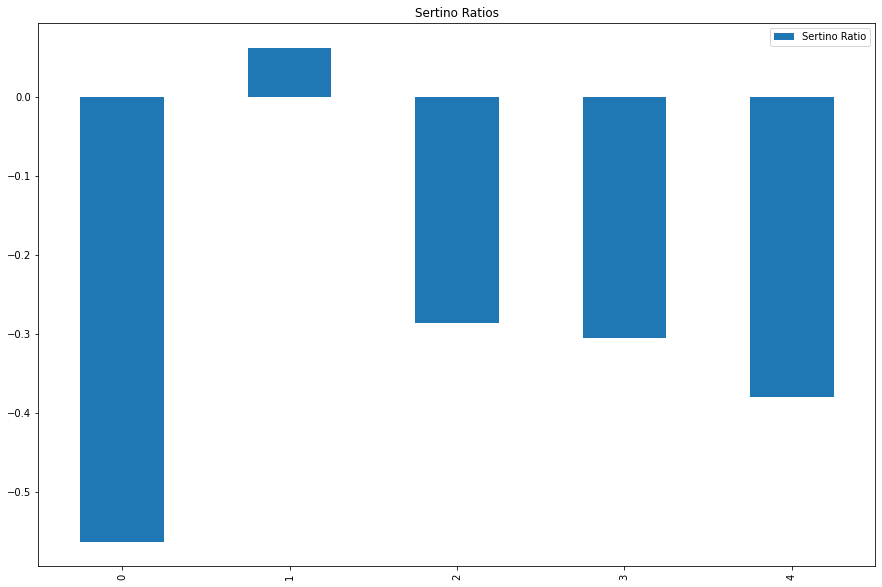

In [42]:
sertino_ratios.plot.bar(figsize=(15,10), title="Sertino Ratios")